# Importing Data 

Once the data is successfuly downloaded from [https://gea.esac.esa.int/archive/](https://gea.esac.esa.int/archive/), and correctly decompressed following the instroctions provided in [Neeed to add link to README from personal github](add-link), we can now import the data on Python and store it as a data frame using the package [pandas](https://pandas.pydata.org/).

Optional, add the following to the sql code to remove impurity in data:
```sql
WHERE gs.parallax < 5 * gs.parallax_error  -- Remove potential stars
AND gs.ruwe < 1.4  -- Ensure good astrometric quality
AND gs.phot_g_mean_mag < 21  -- Bright enough for good measurements
```

In [9]:
from astroquery.gaia import Gaia
import pandas as pd

# Query to get the astrometric properties of QSO-like objects
query = """
SELECT 
    agn.source_id, 
    gs.ra, gs.dec, 
    gs.pmra, gs.pmdec, 
    gs.parallax, gs.parallax_error, 
    gs.ruwe, gs.phot_g_mean_mag,
    gs.nu_eff_used_in_astrometry
FROM gaiadr3.agn_cross_id AS agn
JOIN gaiadr3.gaia_source AS gs 
ON agn.source_id = gs.source_id

"""

# Launch query and download data
job = Gaia.launch_job_async(query)
result = job.get_results()

# Save as CSV
result.write("qso_full_data.csv", format="csv", overwrite=True) # overwrite = True will allow to replace existing data when redownloaded.


INFO: Query finished. [astroquery.utils.tap.core]


In [10]:
import pandas as pd
# Load into Pandas
df = pd.read_csv("qso_full_data.csv")
print(df.head())  # Check the data

        source_id         ra       dec      pmra     pmdec  parallax  \
0   3470333738112  45.075505  0.152316 -1.072371 -3.191011  0.366321   
1   5944234902272  44.884761  0.164806 -0.121274  0.725026 -0.395659   
2   6459630980096  44.910498  0.189649  0.217806 -0.316007 -0.626561   
3   9517648372480  45.254655  0.228999 -0.552941 -1.895446 -0.917219   
4  10892037246720  45.188575  0.282424 -0.098037 -0.120580  0.001630   

   parallax_error      ruwe  phot_g_mean_mag  nu_eff_used_in_astrometry  
0        0.901633  0.889714        20.571114                   1.526179  
1        1.340139  1.087911        20.704517                   1.647388  
2        0.548536  1.020956        20.173105                        NaN  
3        1.507964  1.031971        20.634562                        NaN  
4        0.246332  0.974657        18.787239                   1.565118  


### Column Content

Before we procede, we need to understand what each column contains, to do so let us print the heading of each column.

In [11]:
# Check column names
print(df.columns)

Index(['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error',
       'ruwe', 'phot_g_mean_mag', 'nu_eff_used_in_astrometry'],
      dtype='object')


The output above, displays:

1. <b>source_id</b>, Unique Gaia identifier for the object
2. <b>ra</b>, Right Ascension (celestial longitude) in degrees
3. <b>dec</b>, Declination (celestial latitude) in degrees
4. <b>pmra</b>, Proper motion in Right Ascension (mas/yr)
5. <b>pmdec</b>, Proper motion in Declination (mas/yr)
6. <b>parallax</b>, Parallax measurament (this is expected to be near zero for distant QSOs)
7. <b>ruwe</b>, Renormalised Unit Weight Error (this indicates the quality of the data point)
8. <b>phot_g_mean_mag</b>, Mean magnitude in Gaia's G-band 
9. <b>nu_eff_used_in_astrometry</b>, Efficient wavenumber denoted as $\nu_{eff}$, this is used to charecterise the color of a celestial object by describing how its light is distributed across different wavelenghts.

We want to make suere the data matches the description provided in the papaer, i.e. we expect there to be 1614173 sources which are identified as QSO-like objects. 

In [12]:
# Display the shape of the dataset
df.shape

(1614173, 10)

As expected, the above output confirms that there are 1614173 QSO-like objects in the dataset.

# Visualising Data

In this section we are going to reproduce some of the plots presented in the paper [Gaia Early Data Realease 3, Acceleration of the Solar System from Gaia astrometry](https://www.aanda.org/articles/aa/full_html/2021/05/aa39734-20/aa39734-20.html). 

<b>Efficient wavenumber $\nu_{eff}$</b> distribution visualisation:

(array([7.67985603e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.67985603e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.67985603e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.67985603e-04, 0.00000000e+00, 0.00000000e+00,
        1.53597121e-03, 7.67985603e-04, 7.67985603e-04, 7.67985603e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.53597121e-03,
        0.00000000e+00, 7.67985603e-04, 0.00000000e+00, 0.00000000e+00,
        7.67985603e-04, 1.53597121e-03, 7.67985603e-04, 7.67985603e-04,
        0.00000000e+00, 2.30395681e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.67985603e-04,
        3.83992801e-03, 0.00000000e+00, 1.53597121e-03, 7.679856

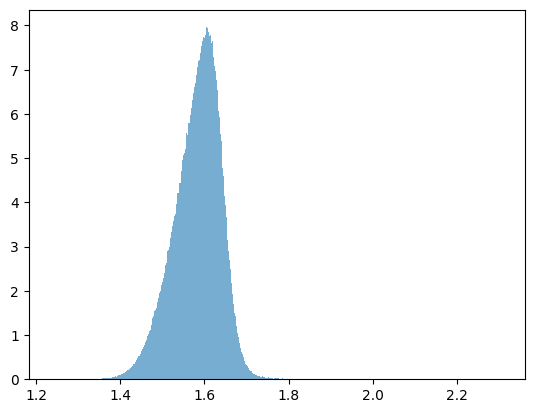

In [23]:
import matplotlib.pyplot as plt

# setting data_nu_eff

data_nu_eff = df['nu_eff_used_in_astrometry']

plt.hist(data_nu_eff, bins=1000, density=True, alpha=0.6)
